In [1]:
import numpy as np
import seaborn as sns

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 수치 데이터들만 골라냅니다.

In [2]:
df = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


### Standardization (정규화) 합니다.

In [3]:
mean = np.array(df.mean())
std = np.array(df.std())
df=(df-mean)/(std + 1e-8)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.883205,0.784300,-1.416272,-0.563317
1,-0.809939,0.126003,-1.060696,-0.500969
2,-0.663408,0.429833,-0.420660,-1.186793
3,NaN,NaN,NaN,NaN
4,-1.322799,1.088129,-0.562890,-0.937403


### NaN(Not a Number) 인 데이터를 평균값으로 채워줍니다.

In [4]:
df = df.fillna(df.mean())
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-8.832047e-01,7.843001e-01,-1.416272e+00,-5.633167e-01
1,-8.099390e-01,1.260033e-01,-1.060696e+00,-5.009690e-01
2,-6.634077e-01,4.298326e-01,-4.206603e-01,-1.186793e+00
3,2.077610e-16,-1.454327e-15,-7.894919e-16,4.155221e-17
4,-1.322799e+00,1.088129e+00,-5.628905e-01,-9.374027e-01
...,...,...,...,...
339,2.077610e-16,-1.454327e-15,-7.894919e-16,4.155221e-17
340,5.271593e-01,-1.443781e+00,1.001641e+00,8.083321e-01
341,1.186550e+00,-7.348464e-01,1.499447e+00,1.930590e+00
342,2.340966e-01,-1.190590e+00,7.882962e-01,1.244766e+00


### 각 변량 (variate)들의 관계를 plot해줍니다.

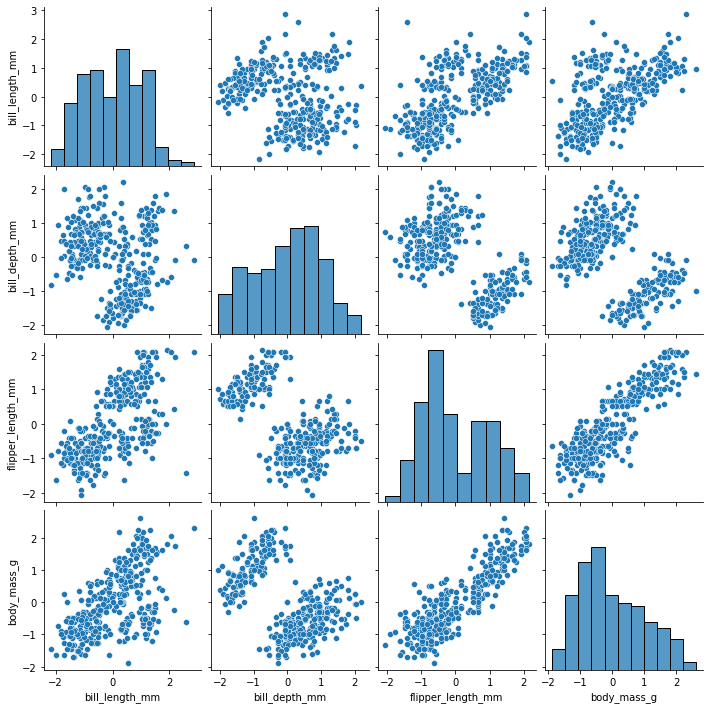

In [5]:
sns.pairplot(df)

### GMM 알고리즘을 수행합니다.

In [6]:
from sklearn.mixture import GaussianMixture
# 클러스터 갯수를 설정합니다.
n_clusters = 3

# dataframe의 데이터를 이용하여 K-Means 알고리즘을 수행합니다.
gmm = GaussianMixture(n_components=n_clusters).fit(df)

# 수행한 결과를 labels라는 column에 저장합니다.
df['labels'] = gmm.predict(df)

### GMM의 결과에 따라 pairplot을 그려줍니다.

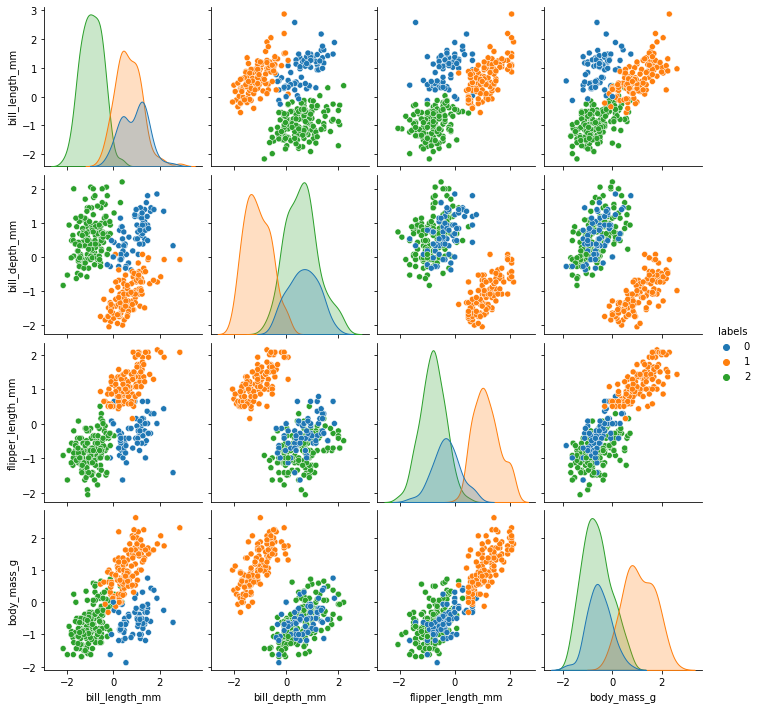

In [7]:
sns.pairplot(df, hue='labels', palette=sns.color_palette()[:n_clusters])

### Center들의 값을 보여줍니다.

In [8]:
centers_denorm = mean[None, :] + (gmm.means_ * std[None, :])
print(centers_denorm)

[[  48.75632456   18.43584057  196.56631009 3764.88010731]
 [  47.5048827    14.98211036  217.18698917 5076.01600171]
 [  38.7947585    18.32284082  189.69918124 3692.3702096 ]]


### 새로운 데이터에 대한 cluster를 예측합니다.

/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


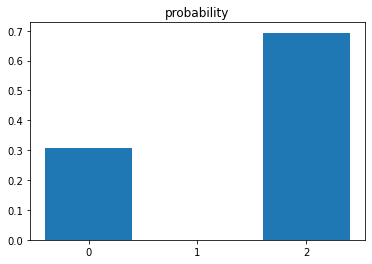

In [29]:
import matplotlib.pyplot as plt
x_test = np.array([[42, 16, 193, 4000]])
x_test_norm = (x_test - mean) / (std + 1e-8)
proba = gmm.predict_proba(x_test_norm)
ticks = [i for i in range(n_clusters)]

plt.title('probability')
plt.bar(ticks, proba[0])
plt.xticks(ticks)
plt.show()